In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from array import *


Using TensorFlow backend.


In [2]:
m=3000
x_train=np.random.uniform(-10,10, size=(m,2))
y_train =np.zeros(shape=(m,1), dtype='int32')
np.random.seed()
for i in range (m):
    np.random.seed()
    coef=np.random.randint(0,2)
    if (coef == 1):
        x_train[i][1] = x_train[i][0] *x_train[i][0] 
        y_train[i] = 1
    if(coef == 0):
        x_train[i][1] = np.random.uniform(0, 100)
        y_train[i] = 0

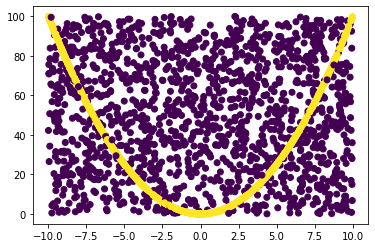

In [3]:
x = [0]*m
y = [0]*m
color = [0]*m
for i in range (m):
    x[i] = x_train[i][0]
    y[i] = x_train[i][1]
    if (y_train[i] ==1):
        color[i]=1
 
plt.scatter(x,y, c = color)

In [13]:
discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Dense(25, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])   

In [5]:
epochs_number=500
optimizer = tf.keras.optimizers.Adam(0.0001)
discriminator.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
history=discriminator.fit(x_train, y_train, epochs=epochs_number,verbose=0)
print(history.history['loss'][epochs_number-1])
print(history.history['acc'][epochs_number-1])

W1016 18:15:37.507970 12728 deprecation.py:323] From I:\Anaconda\envs\neural\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


0.48266879804929097
0.7403333


In [14]:
latent_dim=5
gen=tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim),
    tf.keras.layers.Dense(2, activation='linear'),
])

In [21]:
def chain_gen(generator, discriminator):   
    discriminator.trainable = False   
    model = tf.keras.models.Sequential()       
    model.add(generator)   
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer='adam')    
    return model

In [22]:
chain_gen(gen, discriminator).fit(epochs=50,verbose=0,steps_per_epoch=1000)


InvalidArgumentError: You must feed a value for placeholder tensor 'sequential_7_input_3' with dtype float and shape [?,5]
	 [[{{node sequential_7_input_3}}]]

In [ ]:
from PIL import Image
import imageio

#gan_model.load_weights("output/gan_initial.h5")
images = []
epochs_total = 20000
frames = 100
for i in range (1, frames):
    train(generator, model, chain_gen, 5, n_epochs = int(epochs_total / frames))
    summarize_performance(generator, 5, savename = "output/tmp.png")
    plt.cla()
    image = Image.open("output/tmp.png")
    ar = np.asarray(image)
    images.append(ar)
kargs = { 'duration': 0.1 }
imageio.mimsave('output/gan_learning.gif', images, None, **kargs)